<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [22]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [23]:
## Write your code here
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().mean() * 100)

## Employment is good to go, JobSat will be dropped due to significant null values, and RemoteWork can be imputed with the mode because this is a categorical column

df = df.dropna(subset=['JobSat'])
df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)

print(df['RemoteWork'].isnull().sum())
print(df['JobSat'].isnull().sum())

Employment     0.000000
JobSat        55.490013
RemoteWork    16.246160
dtype: float64
0
0


/tmp/ipykernel_7021/59548044.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)
/tmp/ipykernel_7021/59548044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace=True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


ExperienceRange
0-5      7.0
5-10     7.0
10-20    7.0
20+      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_7021/864536208.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()


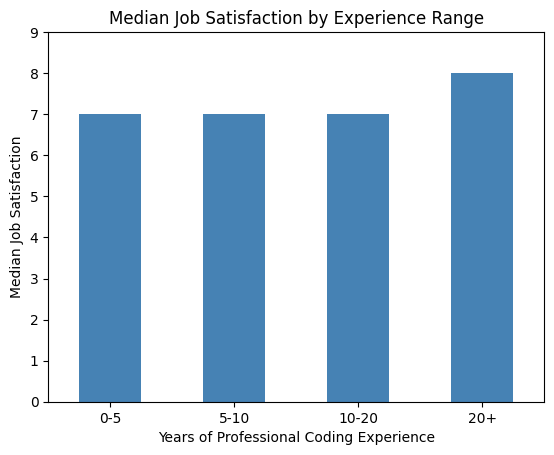

In [25]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median()
print(median_satisfaction)

median_satisfaction.plot(kind='bar', color='steelblue')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.ylim(0, median_satisfaction.max() + 1)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


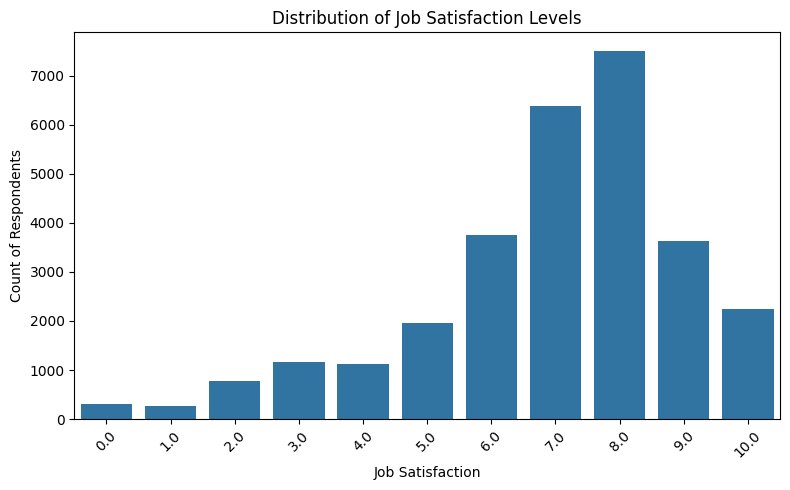

In [27]:
## Write your code here
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='JobSat')
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_7021/3048330421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='Blues')


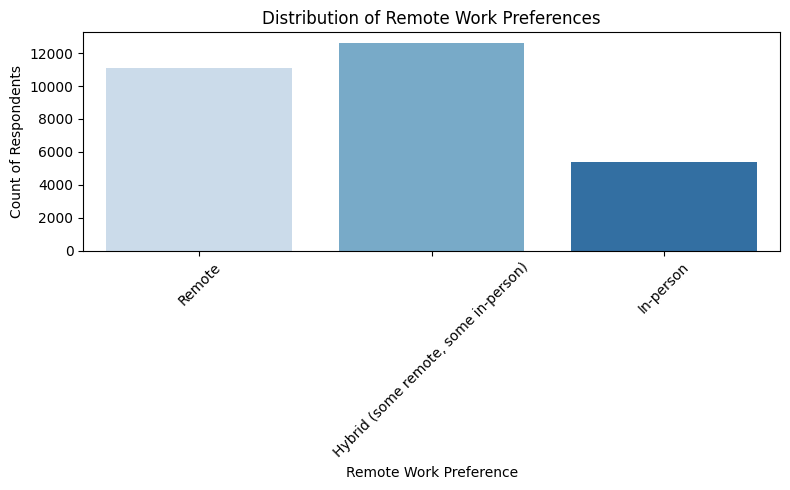

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                            44.411412   
Employed, full-time;Employed, part-time                                        38.582677   
Employed, full-time;Independent contractor, fre...                             36.185072   
Employed, full-time;Independent contractor, fre...                             45.299145   
Employed, full-time;Independent contractor, fre...                              0.000000   
...                                                                                  ...   
Student, full-time;Independent contractor, free...                             33.333333   
Student, full-time;Not employed, but looking fo...                            100.000000   
Student, full-time;Not employed, but looking fo...                             4

In [29]:
## Write your code here
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='RemoteWork', palette='Blues')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
print(remote_by_employment)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_7021/2840624188.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['LanguageList'] = country['LanguageHaveWorkedWith'].str.split(';')
/tmp/ipykernel_7021/2840624188.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='Blues_r')


LanguageList
JavaScript                 3533
SQL                        3222
Python                     3098
HTML/CSS                   2936
Bash/Shell (all shells)    2554
TypeScript                 2360
C#                         1757
Java                       1421
C++                        1121
PowerShell                 1025
Name: count, dtype: int64


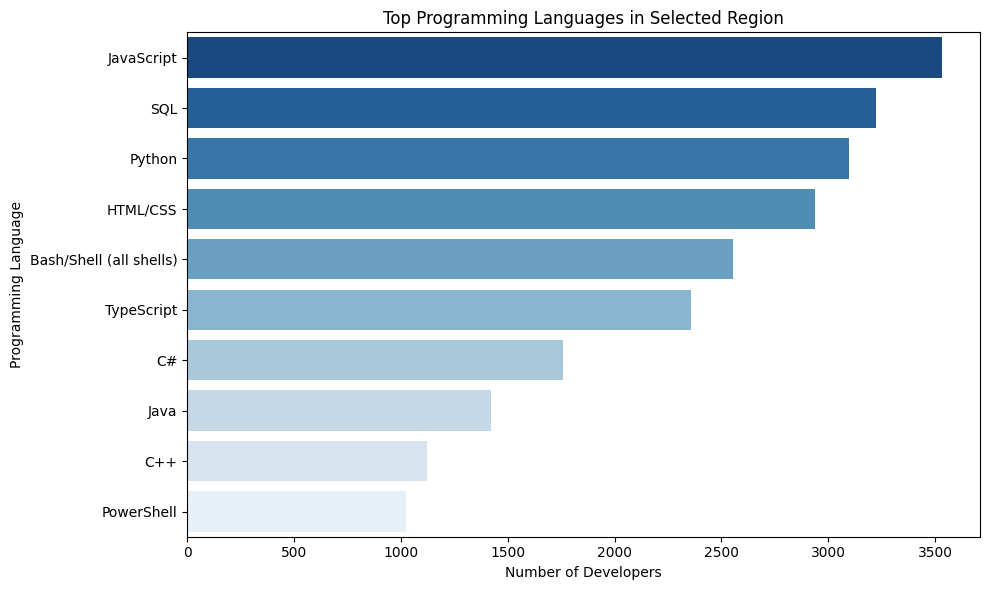

In [38]:
## Write your code here
country = df[df['Country'] == 'United States of America']

country['LanguageList'] = country['LanguageHaveWorkedWith'].str.split(';')
country_exploded = country.explode('LanguageList')

language_counts = country_exploded['LanguageList'].value_counts().head(10)
print(language_counts)

plt.figure(figsize=(10,6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='Blues_r')
plt.title('Top Programming Languages in Selected Region')
plt.xlabel('Number of Developers')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


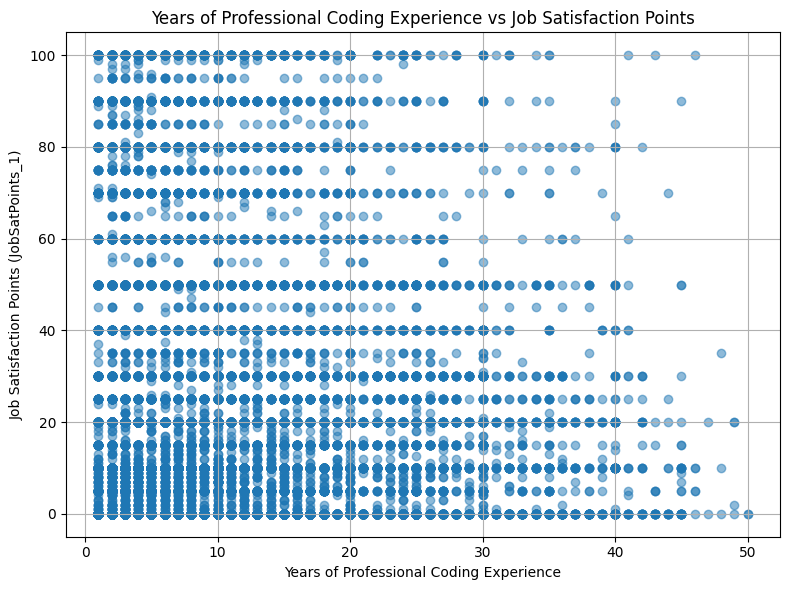

In [39]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
clean_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

plt.figure(figsize=(8,6))
plt.scatter(clean_df['YearsCodePro'], clean_df['JobSatPoints_1'], alpha=0.5)
plt.title('Years of Professional Coding Experience vs Job Satisfaction Points')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points (JobSatPoints_1)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


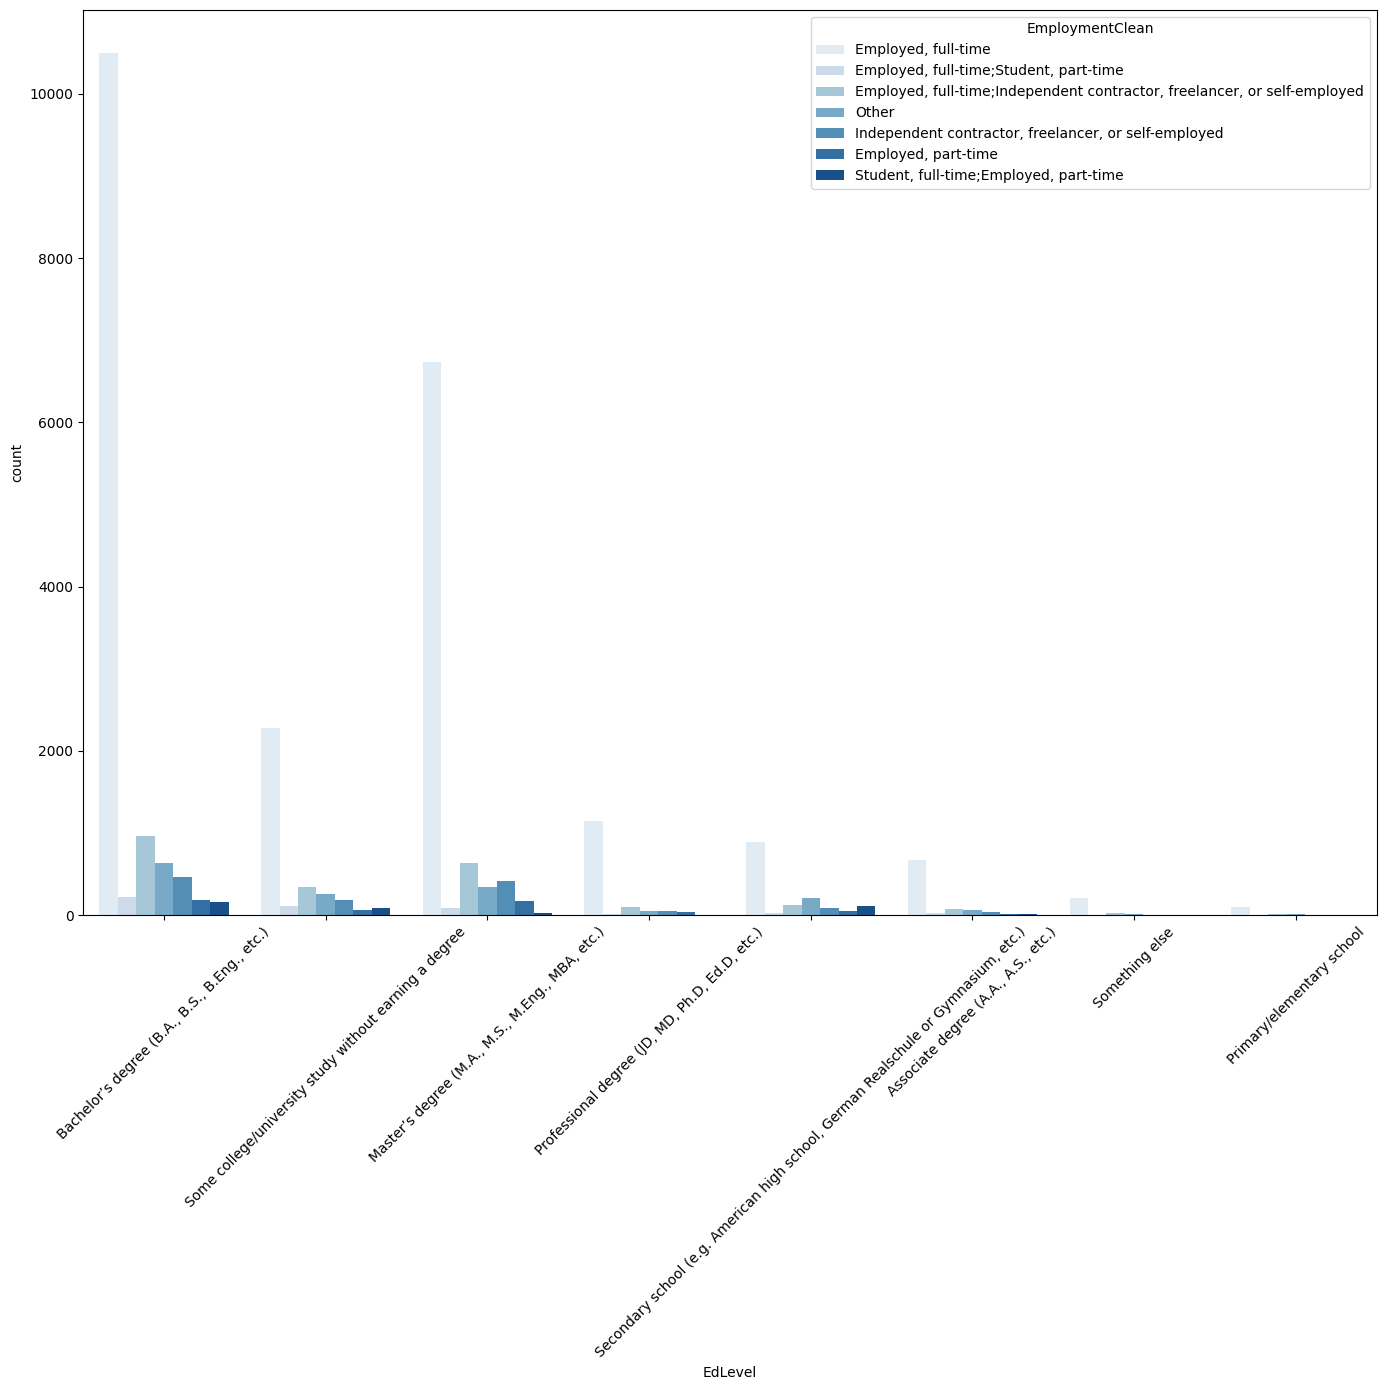

EmploymentClean                                     Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 674   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      10497   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    6731   
Primary/elementary school                                            98   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1147   
Secondary school (e.g. American high school, Ge...                  891   
Some college/university study without earning a...                 2285   
Something else                                                      214   

EmploymentClean                                     Employed, full-time;Independent contractor, freelancer, or self-employed  \
EdLevel                                                                                                                  

In [49]:
## Write your code here
emp_counts = df['Employment'].value_counts()
top_n = 6
top_employment = emp_counts.index[:top_n]

df['EmploymentClean'] = df['Employment'].apply(
    lambda x: x if x in top_employment else 'Other'
)

plt.figure(figsize=(14,14))
sns.countplot(data=df, x='EdLevel', hue='EmploymentClean', palette='Blues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ct = pd.crosstab(df['EdLevel'], df['EmploymentClean'])
print(ct.round(1))

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [50]:
## Write your code here
df.to_csv('cleaned_survey_data.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
